In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
insurance_data = pd.read_csv('datasets/insurance.csv')

insurance_data.sample(10)

,age,sex,bmi,children,smoker,region,charges
18,56,male,40.300,0,no,southwest,10602.38500
1008,25,male,24.985,2,no,northeast,23241.47453
429,27,female,30.400,3,no,northwest,18804.75240
893,47,male,38.940,2,yes,southeast,44202.65360
856,48,female,33.110,0,yes,southeast,40974.16490
779,53,male,28.880,0,no,northwest,9869.81020
869,25,female,24.300,3,no,southwest,4391.65200
473,47,female,33.345,0,no,northeast,20878.78443
1169,37,female,34.105,1,no,northwest,6112.35295
65,19,female,28.900,0,no,southwest,1743.21400


In [3]:
insurance_data.shape

(1338, 7)

In [4]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_data_correlation = insurance_data.corr()

insurance_data_correlation

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

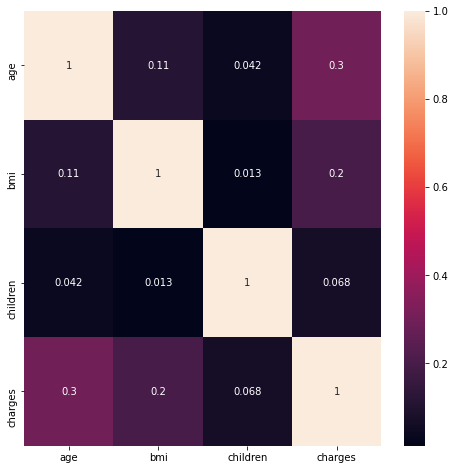

In [6]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(insurance_data_correlation, annot=True)

In [7]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()

In [8]:
insurance_data['region'] = label_encoding.fit_transform(insurance_data['region'].astype(str))

In [9]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,3,16884.92400
1,18,male,33.770,1,no,2,1725.55230
2,28,male,33.000,3,no,2,4449.46200
3,33,male,22.705,0,no,1,21984.47061
4,32,male,28.880,0,no,1,3866.85520


In [10]:
label_encoding.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [11]:
insurance_data = pd.get_dummies(insurance_data, columns=['sex',
                                                         'smoker'])

insurance_data.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
902,26,27.265,3,0,4661.28635,0,1,1,0
821,26,17.670,0,1,2680.94930,0,1,1,0
372,42,33.155,1,0,7639.41745,1,0,1,0
1081,32,27.835,1,1,4454.40265,0,1,1,0
912,59,26.695,3,1,14382.70905,1,0,1,0
321,26,29.640,4,0,24671.66334,1,0,1,0
369,18,30.400,3,0,3481.86800,0,1,1,0
1055,55,27.645,0,1,10594.50155,0,1,1,0
437,35,28.900,3,3,5926.84600,0,1,1,0
1069,54,31.900,1,2,10928.84900,1,0,1,0


In [12]:
insurance_data.to_csv('datasets/insurance_processed.csv', index=False)

In [30]:
!ls datasets

Advertising.csv			     driver_dataset.csv
Bike-Sharing-Dataset		     exams.csv
Daily_Demand_Forecasting_Orders.csv  fb.csv
Facebook_metrics		     goog.csv
PimaIndians.csv			     imports-85.data
PimaIndians_processed.csv	     insurance.csv
amzn.csv			     insurance_processed.csv
auto-mpg.data			     mnist
dataset_Facebook.csv		     titanic.csv
day.csv				     winequality-white.csv
dog.jpg


### Loading Dataset

In [14]:
insurance_data = pd.read_csv('datasets/insurance_processed.csv')

insurance_data.sample(10)

,age,bmi,children,region,charges,sex_female,sex_male,smoker_no,smoker_yes
895,61,44.000,0,3,13063.88300,1,0,1,0
1247,33,29.400,4,3,6059.17300,0,1,1,0
258,51,24.415,4,1,11520.09985,0,1,1,0
1076,47,32.000,1,3,8551.34700,1,0,1,0
165,47,28.215,4,0,10407.08585,0,1,1,0
1098,52,30.875,0,0,23045.56616,1,0,1,0
304,57,38.000,2,3,12646.20700,1,0,1,0
809,25,25.840,1,0,3309.79260,0,1,1,0
681,19,20.300,0,3,1242.26000,0,1,1,0
1056,48,28.900,0,3,8277.52300,1,0,1,0


In [15]:
insurance_data.shape

(1338, 9)

In [16]:
X = insurance_data.drop('charges', axis=1)

Y = insurance_data['charges']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
x_train.shape, y_train.shape

((1070, 8), (1070,))

In [19]:
x_test.shape, y_test.shape

((268, 8), (268,))

### Bagging Regressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score


In [25]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=True, ## bagging technique
                           max_samples=0.8,
                           n_jobs=-1,
                           oob_score=True)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), max_samples=0.8,
                 n_estimators=500, n_jobs=-1, oob_score=True)

In [26]:
bag_reg.oob_score_

0.8326390903459826

In [27]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8716011020564599

In [28]:
bag_reg = BaggingRegressor(DecisionTreeRegressor(), 
                           n_estimators=500,
                           bootstrap=False, ## Pasting technique
                           max_samples=0.9,
                           n_jobs=-1)

bag_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), bootstrap=False,
                 max_samples=0.9, n_estimators=500, n_jobs=-1)

In [29]:
y_pred = bag_reg.predict(x_test)

r2_score(y_test, y_pred)

0.8444783348522468